In [2]:
# Tomita 5
import torch
import torch.nn as nn
import math 
import os
import copy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#print("Current Working Directory:", os.getcwd())
os.chdir( '/home/jupyter-nadia/bachelor-arbeit')

In [4]:
import Experiments.Model as Model
from Experiments.Pre_process_data import stats, stats_avg, min_max_stats

In [5]:
# get stats of language
max, train_src, train_tgt, bin0_src, bin0_tgt, bin1_src, bin1_tgt = stats('data/MyData/Tomita5')
print('max_len:', max, '\ntrain_src:', train_src, '\ntrain_tgt:', train_tgt, '\nbin0_src:', bin0_src, '\nbin0_tgt:', bin0_tgt, '\nbin1_src:', bin1_src, '\nbin1_tgt:', bin1_tgt)


max_len: 100 
train_src: 5000 
train_tgt: 5000 
bin0_src: 1000 
bin0_tgt: 1000 
bin1_src: 1000 
bin1_tgt: 1000


In [6]:
#avg
max, train_src, train_tgt, bin0_src, bin0_tgt, bin1_src, bin1_tgt = stats_avg('data/MyData/Tomita5')
print('max_len:', max, '\ntrain_src:', train_src, '\ntrain_tgt:', train_tgt, '\nbin0_src:', bin0_src, '\nbin0_tgt:', bin0_tgt, '\nbin1_src:', bin1_src, '\nbin1_tgt:', bin1_tgt)

max_len: 100 
train_src: 29.8536 
train_tgt: 59.7072 
bin0_src: 28.578 
bin0_tgt: 57.156 
bin1_src: 75.07 
bin1_tgt: 150.14


In [8]:
#min,max
train_src, train_tgt, bin0_src, bin0_tgt, bin1_src, bin1_tgt = min_max_stats('data/MyData/Tomita5')
print('\ntrain_src:', train_src, '\ntrain_tgt:', train_tgt, '\nbin0_src:', bin0_src, '\nbin0_tgt:', bin0_tgt, '\nbin1_src:', bin1_src, '\nbin1_tgt:', bin1_tgt)


train_src: [2, 50] 
train_tgt: [4, 100] 
bin0_src: [2, 50] 
bin0_tgt: [4, 100] 
bin1_src: [50, 100] 
bin1_tgt: [100, 200]


In [18]:
# initialize the plot values for accuracy 
bin1 = [0,0,0,0,0,0,0,0]  
bin0 = [0,0,0,0,0,0,0,0]  
bin1_uni = [0,0,0,0,0,0,0,0]  
bin0_uni = [0,0,0,0,0,0,0,0]    

In [19]:
# 1. Recurrent (# 6 layers in the main code )
# lesser layers give us slightly worse accuracy
# to beat 4 layers 71%

In [31]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = False
universal = False
no_posi_encoding = False
rope = False
tomita_5_rec = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 4, rope = rope)

In [32]:
epochs = 200
tomita_5_rec.train_eval(epochs)

Epoch [1/200], Loss: 0.429967, dev Accuracy: 14.00%
Epoch [2/200], Loss: 0.393560, dev Accuracy: 18.90%
Epoch [3/200], Loss: 0.367037, dev Accuracy: 20.50%
Epoch [4/200], Loss: 0.350588, dev Accuracy: 19.40%
Epoch [5/200], Loss: 0.330744, dev Accuracy: 20.70%
Epoch [6/200], Loss: 0.319986, dev Accuracy: 23.30%
Epoch [7/200], Loss: 0.319603, dev Accuracy: 22.20%
Epoch [8/200], Loss: 0.319292, dev Accuracy: 20.90%
Epoch [9/200], Loss: 0.302544, dev Accuracy: 26.60%
Epoch [10/200], Loss: 0.321614, dev Accuracy: 28.00%
Epoch [11/200], Loss: 0.274624, dev Accuracy: 30.80%
Epoch [12/200], Loss: 0.244745, dev Accuracy: 29.90%
Epoch [13/200], Loss: 0.304410, dev Accuracy: 34.00%
Epoch [14/200], Loss: 0.204235, dev Accuracy: 42.40%
Epoch [15/200], Loss: 0.235556, dev Accuracy: 43.50%
Epoch [16/200], Loss: 0.154695, dev Accuracy: 52.40%
Epoch [17/200], Loss: 0.140403, dev Accuracy: 54.10%
Epoch [18/200], Loss: 0.144380, dev Accuracy: 48.90%
Epoch [19/200], Loss: 0.105474, dev Accuracy: 63.10%
Ep

In [33]:
bin0[5] = tomita_5_rec.test(0)

accuracy of all bin 0 is:  95.6 %


In [34]:
bin1[5] = tomita_5_rec.test(1)

accuracy of all bin 1 is:  45.8 %


In [35]:
rec, rec_n = tomita_5_rec.get_losses('Recurrent')

In [36]:
tomita_5_rec.visualize(epochs)

In [60]:
#2. Universal
# No posi encoding

In [73]:
url = 'data/MyData/Tomita5'
alibi = False
no_posi_encoding = True
universal = True
tomita_5_uni = Model.run_model(url, learning_rate = 0.001, batch_size = 8, embedding_dim = 32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim =32, scheduler_lr= 200000, dropout = 0.1, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, universal = universal, num_layers =4)

In [74]:
epochs = 200
tomita_5_uni.train_eval(epochs)

Epoch [1/200], Loss: 0.545502, dev Accuracy: 0.10%
Epoch [2/200], Loss: 0.538319, dev Accuracy: 0.10%
Epoch [3/200], Loss: 0.517938, dev Accuracy: 0.10%
Epoch [4/200], Loss: 0.511476, dev Accuracy: 0.10%
Epoch [5/200], Loss: 0.510875, dev Accuracy: 0.10%
Epoch [6/200], Loss: 0.508698, dev Accuracy: 0.10%
Epoch [7/200], Loss: 0.503558, dev Accuracy: 0.10%
Epoch [8/200], Loss: 0.504388, dev Accuracy: 0.10%
Epoch [9/200], Loss: 0.502609, dev Accuracy: 0.10%
Epoch [10/200], Loss: 0.501891, dev Accuracy: 0.10%
Epoch [11/200], Loss: 0.500543, dev Accuracy: 0.10%
Epoch [12/200], Loss: 0.495138, dev Accuracy: 0.20%
Epoch [13/200], Loss: 0.496217, dev Accuracy: 0.10%
Epoch [14/200], Loss: 0.494903, dev Accuracy: 0.10%
Epoch [15/200], Loss: 0.497381, dev Accuracy: 0.10%
Epoch [16/200], Loss: 0.500172, dev Accuracy: 0.10%
Epoch [17/200], Loss: 0.493716, dev Accuracy: 0.20%
Epoch [18/200], Loss: 0.489476, dev Accuracy: 0.20%
Epoch [19/200], Loss: 0.487765, dev Accuracy: 0.10%
Epoch [20/200], Loss:

In [75]:
bin0_uni[0] = tomita_5_uni.test(0)

accuracy of all bin 0 is:  2.1 %


In [76]:
bin1_uni[0] =  tomita_5_uni.test(1)

accuracy of all bin 1 is:  0.0 %


In [77]:
uni, uni_n = tomita_5_uni.get_losses('Universal')

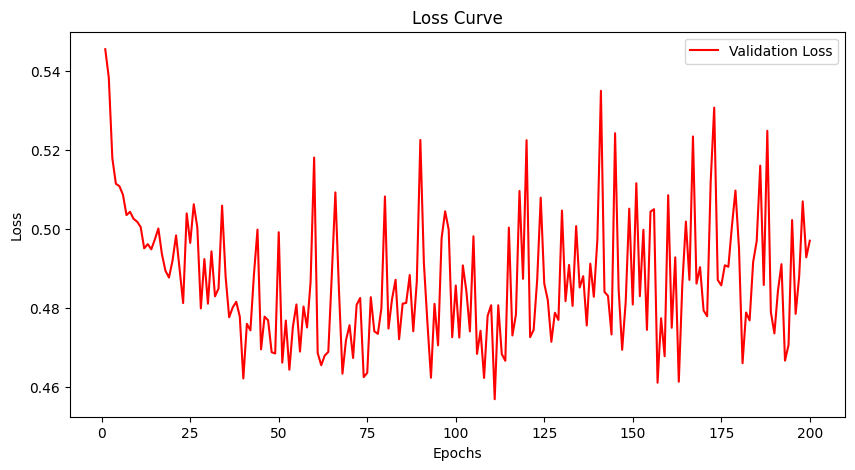

In [78]:
 tomita_5_uni.visualize(epochs)

In [79]:
#3. No positional encoding: 

In [80]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = False
universal = False
no_posi_encoding = True
tomita_5_np = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, no_posi_encoding= no_posi_encoding, layer_number_main= 6)
# when we change the number of layers from 8 to 4 we get better bin1 11.85% ->15%) but worse  bin0 (100% -> 56%)

In [81]:
epochs = 200
tomita_5_np.train_eval(epochs)

Epoch [1/200], Loss: 0.545243, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.522451, dev Accuracy: 0.00%
Epoch [3/200], Loss: 0.504916, dev Accuracy: 0.00%
Epoch [4/200], Loss: 0.511729, dev Accuracy: 0.00%
Epoch [5/200], Loss: 0.483749, dev Accuracy: 0.00%
Epoch [6/200], Loss: 0.485283, dev Accuracy: 0.10%
Epoch [7/200], Loss: 0.478305, dev Accuracy: 0.00%
Epoch [8/200], Loss: 0.482636, dev Accuracy: 0.00%
Epoch [9/200], Loss: 0.459101, dev Accuracy: 0.00%
Epoch [10/200], Loss: 0.449742, dev Accuracy: 0.60%
Epoch [11/200], Loss: 0.453452, dev Accuracy: 0.60%
Epoch [12/200], Loss: 0.460479, dev Accuracy: 0.60%
Epoch [13/200], Loss: 0.464699, dev Accuracy: 0.70%
Epoch [14/200], Loss: 0.451598, dev Accuracy: 0.90%
Epoch [15/200], Loss: 0.449228, dev Accuracy: 1.00%
Epoch [16/200], Loss: 0.465310, dev Accuracy: 0.70%
Epoch [17/200], Loss: 0.449037, dev Accuracy: 0.70%
Epoch [18/200], Loss: 0.443213, dev Accuracy: 0.70%
Epoch [19/200], Loss: 0.443903, dev Accuracy: 0.00%
Epoch [20/200], Loss:

In [82]:
bin0[0] = tomita_5_np.test(0)

accuracy of all bin 0 is:  5.4 %


In [83]:
bin1[0] = tomita_5_np.test(1)

accuracy of all bin 1 is:  0.0 %


In [84]:
nop, nop_n = tomita_5_np.get_losses('No Positional Encoding')

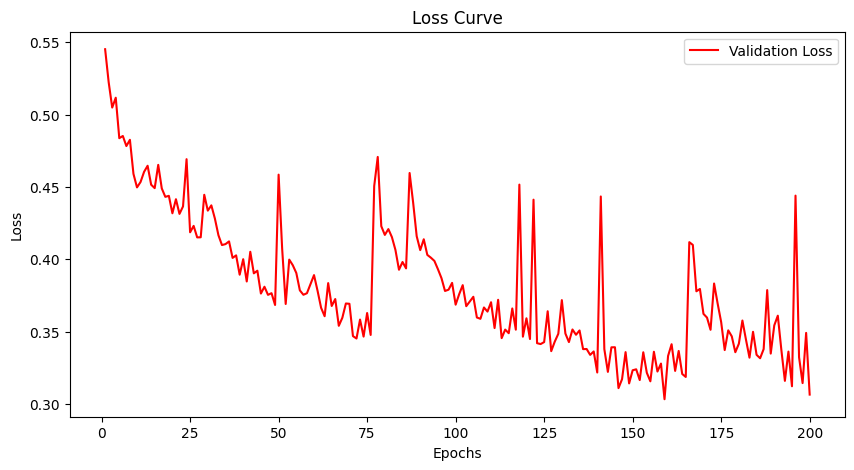

In [85]:
 tomita_5_np.visualize(epochs)

In [86]:
#4. Standard Positional encoding

In [87]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = False
universal = False
no_posi_encoding = False
tomita_5_sin = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, no_posi_encoding= no_posi_encoding, layer_number_main= 6)
# when we change the number of layers from 8 to 4 we get better bin1 11.85% ->15.2%) but worse  bin0 (100% -> 56.4%)

In [88]:
epochs = 200
tomita_5_sin.train_eval(epochs)

Epoch [1/200], Loss: 0.533479, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.500261, dev Accuracy: 0.00%
Epoch [3/200], Loss: 0.475383, dev Accuracy: 0.00%
Epoch [4/200], Loss: 0.451905, dev Accuracy: 0.20%
Epoch [5/200], Loss: 0.419853, dev Accuracy: 1.00%
Epoch [6/200], Loss: 0.403521, dev Accuracy: 2.40%
Epoch [7/200], Loss: 0.382266, dev Accuracy: 4.50%
Epoch [8/200], Loss: 0.381462, dev Accuracy: 4.90%
Epoch [9/200], Loss: 0.397600, dev Accuracy: 2.50%
Epoch [10/200], Loss: 0.364470, dev Accuracy: 2.80%
Epoch [11/200], Loss: 0.329941, dev Accuracy: 7.60%
Epoch [12/200], Loss: 0.322381, dev Accuracy: 7.70%
Epoch [13/200], Loss: 0.332332, dev Accuracy: 9.80%
Epoch [14/200], Loss: 0.297816, dev Accuracy: 14.80%
Epoch [15/200], Loss: 0.282485, dev Accuracy: 16.20%
Epoch [16/200], Loss: 0.288040, dev Accuracy: 14.50%
Epoch [17/200], Loss: 0.274154, dev Accuracy: 15.40%
Epoch [18/200], Loss: 0.266881, dev Accuracy: 18.10%
Epoch [19/200], Loss: 0.278315, dev Accuracy: 19.30%
Epoch [20/200],

In [89]:
bin0[1] = tomita_5_sin.test(0)

accuracy of all bin 0 is:  91.1 %


In [90]:
bin1[1] = tomita_5_sin.test(1)

accuracy of all bin 1 is:  1.6 %


In [91]:
sin, sin_n = tomita_5_sin.get_losses('Sin')

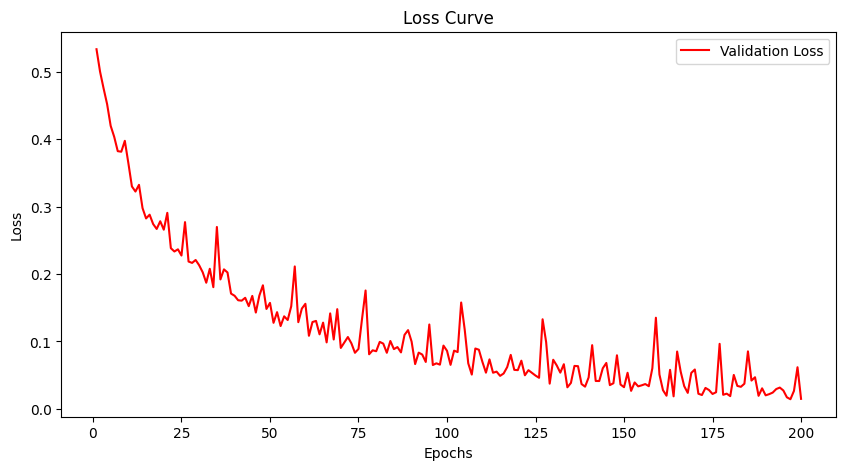

In [92]:
tomita_5_sin.visualize(epochs)

In [93]:
#5. Cos Positional encoding

In [185]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = False
universal = False
no_posi_encoding = False
tomita_5_cos = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'cos', no_posi_encoding= no_posi_encoding, layer_number_main= 6)


In [186]:
epochs = 200
tomita_5_cos.train_eval(epochs)

Epoch [1/200], Loss: 0.545677, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.529280, dev Accuracy: 0.00%
Epoch [3/200], Loss: 0.510390, dev Accuracy: 0.00%
Epoch [4/200], Loss: 0.494289, dev Accuracy: 0.00%
Epoch [5/200], Loss: 0.496099, dev Accuracy: 0.00%
Epoch [6/200], Loss: 0.493333, dev Accuracy: 0.00%
Epoch [7/200], Loss: 0.485216, dev Accuracy: 0.00%
Epoch [8/200], Loss: 0.468901, dev Accuracy: 0.10%
Epoch [9/200], Loss: 0.474114, dev Accuracy: 0.30%
Epoch [10/200], Loss: 0.463706, dev Accuracy: 0.20%
Epoch [11/200], Loss: 0.455459, dev Accuracy: 0.20%
Epoch [12/200], Loss: 0.467731, dev Accuracy: 0.10%
Epoch [13/200], Loss: 0.461860, dev Accuracy: 0.80%
Epoch [14/200], Loss: 0.434896, dev Accuracy: 0.90%
Epoch [15/200], Loss: 0.426381, dev Accuracy: 0.80%
Epoch [16/200], Loss: 0.427509, dev Accuracy: 1.00%
Epoch [17/200], Loss: 0.432900, dev Accuracy: 0.80%
Epoch [18/200], Loss: 0.435303, dev Accuracy: 1.00%
Epoch [19/200], Loss: 0.448651, dev Accuracy: 0.20%
Epoch [20/200], Loss:

In [187]:
bin0[2] = tomita_5_cos.test(0)

accuracy of all bin 0 is:  2.1 %


In [188]:
bin1[2] = tomita_5_cos.test(1)

accuracy of all bin 1 is:  0.0 %


In [189]:
cos, cos_n = tomita_5_cos.get_losses('Cos')

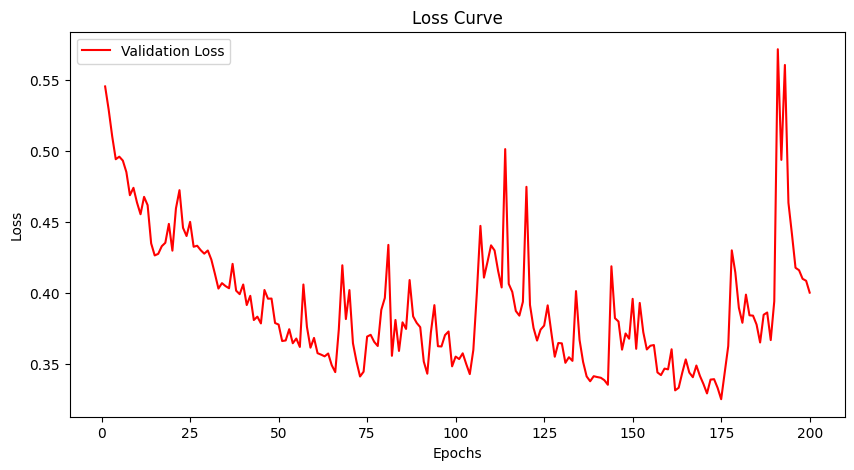

In [190]:
tomita_5_cos.visualize(epochs)

In [ ]:
#6. learnable 

In [100]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = False
universal = False
no_posi_encoding = False
tomita_5_learn = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'learnable', no_posi_encoding= no_posi_encoding, layer_number_main= 6)

In [101]:
epochs = 200
tomita_5_learn.train_eval(epochs)

Epoch [1/200], Loss: 0.545499, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.524307, dev Accuracy: 0.00%
Epoch [3/200], Loss: 0.506160, dev Accuracy: 0.00%
Epoch [4/200], Loss: 0.491437, dev Accuracy: 0.00%
Epoch [5/200], Loss: 0.483863, dev Accuracy: 0.00%
Epoch [6/200], Loss: 0.475780, dev Accuracy: 0.00%
Epoch [7/200], Loss: 0.470148, dev Accuracy: 0.00%
Epoch [8/200], Loss: 0.463158, dev Accuracy: 0.00%
Epoch [9/200], Loss: 0.454088, dev Accuracy: 0.00%
Epoch [10/200], Loss: 0.442841, dev Accuracy: 0.70%
Epoch [11/200], Loss: 0.440488, dev Accuracy: 0.60%
Epoch [12/200], Loss: 0.437959, dev Accuracy: 0.10%
Epoch [13/200], Loss: 0.434455, dev Accuracy: 0.30%
Epoch [14/200], Loss: 0.438088, dev Accuracy: 0.90%
Epoch [15/200], Loss: 0.419803, dev Accuracy: 0.90%
Epoch [16/200], Loss: 0.431886, dev Accuracy: 1.00%
Epoch [17/200], Loss: 0.453938, dev Accuracy: 0.90%
Epoch [18/200], Loss: 0.446101, dev Accuracy: 1.00%
Epoch [19/200], Loss: 0.410884, dev Accuracy: 0.20%
Epoch [20/200], Loss:

In [102]:
bin0[3] = tomita_5_learn.test(0)

accuracy of all bin 0 is:  7.4 %


In [103]:
bin1[3] = tomita_5_learn.test(1)

accuracy of all bin 1 is:  0.0 %


In [104]:
learn, learn_n = tomita_5_learn.get_losses('Learnable')

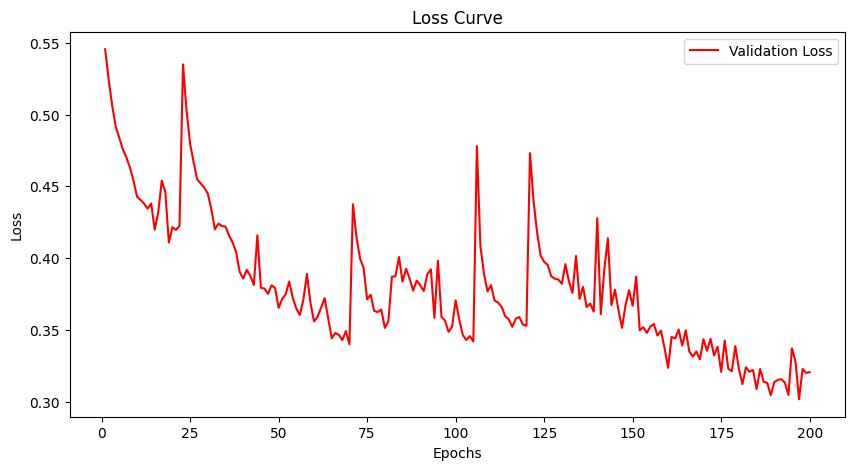

In [105]:
tomita_5_learn.visualize(epochs)

In [106]:
#7. learnable Period 

In [107]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = False
universal = False
no_posi_encoding = False
tomita_5_lp = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'learn_period', no_posi_encoding= no_posi_encoding, layer_number_main= 6)
# we tried higher layer numbers for the learnable positional encodings but after a particular number it no longer leraned properly and just made it slower as it had a lot of layers

In [108]:
epochs = 200
tomita_5_lp.train_eval(epochs)

Epoch [1/200], Loss: 0.546763, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.529049, dev Accuracy: 0.00%
Epoch [3/200], Loss: 0.513901, dev Accuracy: 0.00%
Epoch [4/200], Loss: 0.504370, dev Accuracy: 0.00%
Epoch [5/200], Loss: 0.490082, dev Accuracy: 0.00%
Epoch [6/200], Loss: 0.488599, dev Accuracy: 0.00%
Epoch [7/200], Loss: 0.480419, dev Accuracy: 0.00%
Epoch [8/200], Loss: 0.469165, dev Accuracy: 0.00%
Epoch [9/200], Loss: 0.462164, dev Accuracy: 0.20%
Epoch [10/200], Loss: 0.455930, dev Accuracy: 0.00%
Epoch [11/200], Loss: 0.451925, dev Accuracy: 0.50%
Epoch [12/200], Loss: 0.469226, dev Accuracy: 0.50%
Epoch [13/200], Loss: 0.441951, dev Accuracy: 0.50%
Epoch [14/200], Loss: 0.437490, dev Accuracy: 0.40%
Epoch [15/200], Loss: 0.440513, dev Accuracy: 0.90%
Epoch [16/200], Loss: 0.435575, dev Accuracy: 0.90%
Epoch [17/200], Loss: 0.479200, dev Accuracy: 0.80%
Epoch [18/200], Loss: 0.458943, dev Accuracy: 0.80%
Epoch [19/200], Loss: 0.439906, dev Accuracy: 0.20%
Epoch [20/200], Loss:

In [109]:
bin0[4] = tomita_5_lp.test(0)

accuracy of all bin 0 is:  71.4 %


In [110]:
bin1[4] = tomita_5_lp.test(1)

accuracy of all bin 1 is:  0.1 %


In [111]:
lp, lp_n = tomita_5_lp.get_losses('Learnable Period')

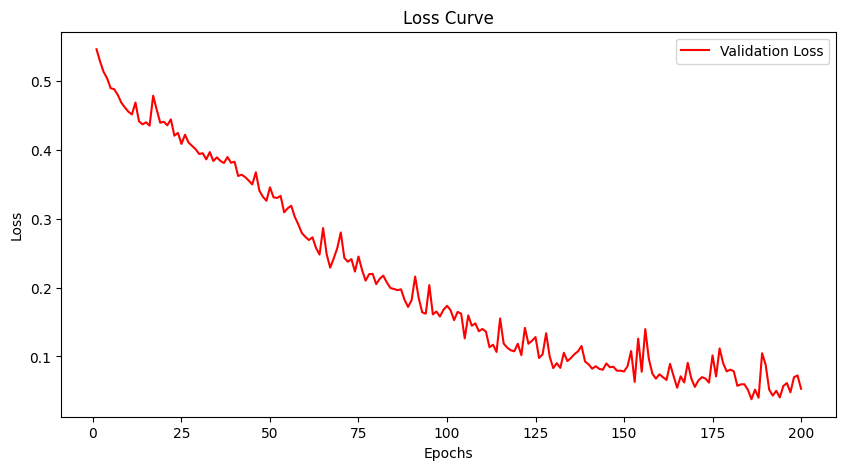

In [112]:
tomita_5_lp.visualize(epochs)

In [55]:
#8 rope

In [113]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = False
universal = False
no_posi_encoding = False
rope= True
tomita_5_rope = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 6, rope= rope)

In [114]:
epochs = 200
tomita_5_rope.train_eval(epochs)

Epoch [1/200], Loss: 0.568174, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.504177, dev Accuracy: 0.00%
Epoch [3/200], Loss: 0.468328, dev Accuracy: 0.00%
Epoch [4/200], Loss: 0.449478, dev Accuracy: 0.00%
Epoch [5/200], Loss: 0.432243, dev Accuracy: 0.00%
Epoch [6/200], Loss: 0.416307, dev Accuracy: 0.30%
Epoch [7/200], Loss: 0.416421, dev Accuracy: 0.80%
Epoch [8/200], Loss: 0.381801, dev Accuracy: 1.00%
Epoch [9/200], Loss: 0.392567, dev Accuracy: 1.10%
Epoch [10/200], Loss: 0.368950, dev Accuracy: 1.10%
Epoch [11/200], Loss: 0.371362, dev Accuracy: 1.50%
Epoch [12/200], Loss: 0.355662, dev Accuracy: 1.50%
Epoch [13/200], Loss: 0.439051, dev Accuracy: 1.50%
Epoch [14/200], Loss: 0.356013, dev Accuracy: 1.50%
Epoch [15/200], Loss: 0.338772, dev Accuracy: 2.60%
Epoch [16/200], Loss: 0.333829, dev Accuracy: 3.20%
Epoch [17/200], Loss: 0.323654, dev Accuracy: 4.70%
Epoch [18/200], Loss: 0.325470, dev Accuracy: 5.00%
Epoch [19/200], Loss: 0.323668, dev Accuracy: 3.50%
Epoch [20/200], Loss:

In [115]:
bin0[7] = tomita_5_rope.test(0)

accuracy of all bin 0 is:  38.1 %


In [116]:
bin1[7] = tomita_5_rope.test(1)

accuracy of all bin 1 is:  0.0 %


In [193]:
rope, rope_n = tomita_5_rope.get_losses('RoPE')

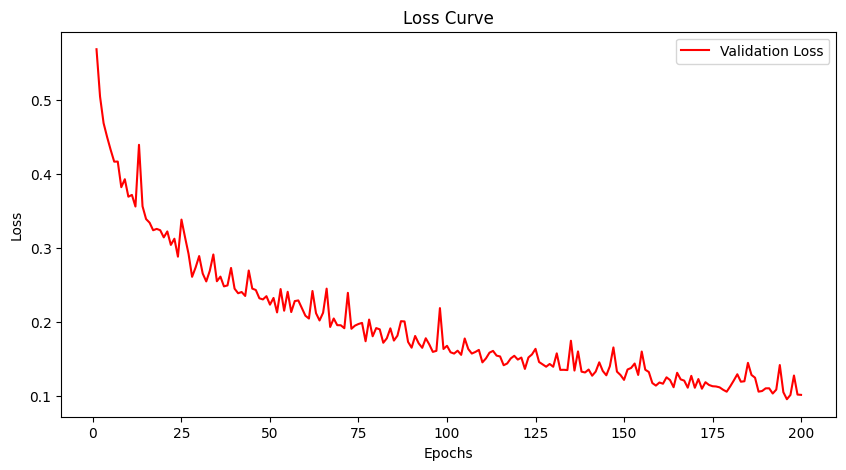

In [118]:
tomita_5_rope.visualize(epochs)

In [119]:
#9 Alibi

In [120]:
# ALIBI

In [212]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = True
universal = False
no_posi_encoding = False
rope= False
tomita_5_alibi = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads=16, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 16, scheduler_lr= 200000, pos_enc = 'recurrent', dropout = 0.0, alibi = alibi, no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 4, rope= rope)

In [ ]:
epochs = 200
tomita_5_alibi.train_eval(epochs)

Epoch [1/200], Loss: 0.544628, dev Accuracy: 0.10%
Epoch [2/200], Loss: 0.529368, dev Accuracy: 0.00%
Epoch [3/200], Loss: 0.511394, dev Accuracy: 0.10%
Epoch [4/200], Loss: 0.500894, dev Accuracy: 0.10%
Epoch [5/200], Loss: 0.496954, dev Accuracy: 0.00%
Epoch [6/200], Loss: 0.480483, dev Accuracy: 0.10%
Epoch [7/200], Loss: 0.471393, dev Accuracy: 0.10%
Epoch [8/200], Loss: 0.461078, dev Accuracy: 0.20%
Epoch [9/200], Loss: 0.451651, dev Accuracy: 0.10%
Epoch [10/200], Loss: 0.458307, dev Accuracy: 0.50%
Epoch [11/200], Loss: 0.443873, dev Accuracy: 0.60%
Epoch [12/200], Loss: 0.443684, dev Accuracy: 0.30%
Epoch [13/200], Loss: 0.432618, dev Accuracy: 0.50%
Epoch [14/200], Loss: 0.428637, dev Accuracy: 0.60%
Epoch [15/200], Loss: 0.426125, dev Accuracy: 0.50%
Epoch [16/200], Loss: 0.429621, dev Accuracy: 0.60%
Epoch [17/200], Loss: 0.422475, dev Accuracy: 0.70%
Epoch [18/200], Loss: 0.427474, dev Accuracy: 0.50%
Epoch [19/200], Loss: 0.417858, dev Accuracy: 0.70%
Epoch [20/200], Loss:

In [ ]:
bin0[6] = tomita_5_alibi.test(0)

In [ ]:
bin1[6] = tomita_5_alibi.test(1)

In [ ]:
alibi, alibi_n = tomita_5_alibi.get_losses('ALiBi')

In [ ]:
tomita_5_alibi.visualize(epochs)

In [127]:
#10. Combos uni+recurrent

In [136]:
# Tomita 5:

url = 'data/MyData/Tomita5'
alibi = False
universal = True
no_posi_encoding = False
rope= False
tomita_5_uni_rec = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, universal = universal, num_layers =6, rope= rope)

In [137]:
epochs = 200
tomita_5_uni_rec.train_eval(epochs)

Epoch [1/200], Loss: 0.568962, dev Accuracy: 1.00%
Epoch [2/200], Loss: 0.470554, dev Accuracy: 4.60%
Epoch [3/200], Loss: 0.416606, dev Accuracy: 13.30%
Epoch [4/200], Loss: 0.385838, dev Accuracy: 17.40%
Epoch [5/200], Loss: 0.353053, dev Accuracy: 20.40%
Epoch [6/200], Loss: 0.324855, dev Accuracy: 24.00%
Epoch [7/200], Loss: 0.307446, dev Accuracy: 27.20%
Epoch [8/200], Loss: 0.285128, dev Accuracy: 29.50%
Epoch [9/200], Loss: 0.287110, dev Accuracy: 29.80%
Epoch [10/200], Loss: 0.289724, dev Accuracy: 33.80%
Epoch [11/200], Loss: 0.264857, dev Accuracy: 34.10%
Epoch [12/200], Loss: 0.253325, dev Accuracy: 34.20%
Epoch [13/200], Loss: 0.243429, dev Accuracy: 38.00%
Epoch [14/200], Loss: 0.269892, dev Accuracy: 34.50%
Epoch [15/200], Loss: 0.231015, dev Accuracy: 40.90%
Epoch [16/200], Loss: 0.223005, dev Accuracy: 40.80%
Epoch [17/200], Loss: 0.208966, dev Accuracy: 42.50%
Epoch [18/200], Loss: 0.292205, dev Accuracy: 38.70%
Epoch [19/200], Loss: 0.272676, dev Accuracy: 40.90%
Epoc

In [138]:
bin0_uni[5] = tomita_5_uni_rec.test(0)

accuracy of all bin 0 is:  80.3 %


In [139]:
bin1_uni[5] = tomita_5_uni_rec.test(1)

accuracy of all bin 1 is:  16.7 %


In [140]:
rec_uni, rec_uni_n = tomita_5_uni_rec.get_losses('Universal + Recurrent')

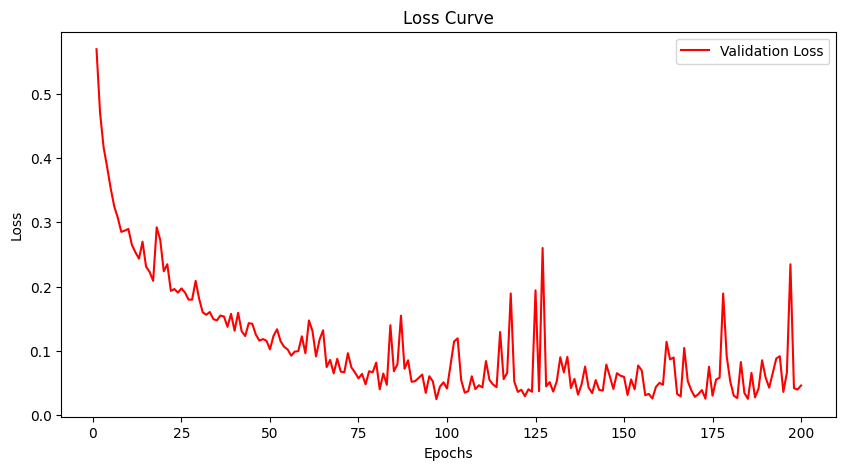

In [141]:
tomita_5_uni_rec.visualize(epochs)

In [134]:
#11. combos: universal + cos

In [142]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_5_uni_cos = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'cos',no_posi_encoding= no_posi_encoding, num_layers= 6, rope= rope)

In [143]:
epochs = 200
tomita_5_uni_cos.train_eval(epochs)

Epoch [1/200], Loss: 0.550739, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.548042, dev Accuracy: 0.00%
Epoch [3/200], Loss: 0.536540, dev Accuracy: 0.00%
Epoch [4/200], Loss: 0.525422, dev Accuracy: 0.10%
Epoch [5/200], Loss: 0.520441, dev Accuracy: 0.10%
Epoch [6/200], Loss: 0.511949, dev Accuracy: 0.10%
Epoch [7/200], Loss: 0.505004, dev Accuracy: 0.10%
Epoch [8/200], Loss: 0.502821, dev Accuracy: 0.10%
Epoch [9/200], Loss: 0.498317, dev Accuracy: 0.10%
Epoch [10/200], Loss: 0.488414, dev Accuracy: 0.10%
Epoch [11/200], Loss: 0.486992, dev Accuracy: 0.10%
Epoch [12/200], Loss: 0.477903, dev Accuracy: 0.10%
Epoch [13/200], Loss: 0.480233, dev Accuracy: 0.00%
Epoch [14/200], Loss: 0.470781, dev Accuracy: 0.10%
Epoch [15/200], Loss: 0.475869, dev Accuracy: 0.10%
Epoch [16/200], Loss: 0.470827, dev Accuracy: 0.10%
Epoch [17/200], Loss: 0.477548, dev Accuracy: 0.10%
Epoch [18/200], Loss: 0.469341, dev Accuracy: 0.10%
Epoch [19/200], Loss: 0.478796, dev Accuracy: 0.10%
Epoch [20/200], Loss:

In [144]:
bin0_uni[2] = tomita_5_uni_cos.test(0)

accuracy of all bin 0 is:  3.4 %


In [145]:
bin1_uni[2] = tomita_5_uni_cos.test(1)

accuracy of all bin 1 is:  0.0 %


In [146]:
cos_uni, cos_uni_n = tomita_5_uni_cos.get_losses('Universal + Cos')

In [147]:
tomita_5_uni_cos.visualize(epochs)

In [148]:
#12. combos: universal + learnable

In [149]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_5_uni_learn = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'learnable',no_posi_encoding= no_posi_encoding, num_layers= 6, rope= rope)

In [150]:
epochs = 200
tomita_5_uni_learn.train_eval(epochs)

Epoch [1/200], Loss: 0.552100, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.547905, dev Accuracy: 0.10%
Epoch [3/200], Loss: 0.528781, dev Accuracy: 0.10%
Epoch [4/200], Loss: 0.516427, dev Accuracy: 0.10%
Epoch [5/200], Loss: 0.509802, dev Accuracy: 0.10%
Epoch [6/200], Loss: 0.499619, dev Accuracy: 0.10%
Epoch [7/200], Loss: 0.492009, dev Accuracy: 0.10%
Epoch [8/200], Loss: 0.491172, dev Accuracy: 0.10%
Epoch [9/200], Loss: 0.491006, dev Accuracy: 0.10%
Epoch [10/200], Loss: 0.472761, dev Accuracy: 0.30%
Epoch [11/200], Loss: 0.476264, dev Accuracy: 0.10%
Epoch [12/200], Loss: 0.460375, dev Accuracy: 0.10%
Epoch [13/200], Loss: 0.458067, dev Accuracy: 0.10%
Epoch [14/200], Loss: 0.457438, dev Accuracy: 0.10%
Epoch [15/200], Loss: 0.450461, dev Accuracy: 0.10%
Epoch [16/200], Loss: 0.451548, dev Accuracy: 0.10%
Epoch [17/200], Loss: 0.483903, dev Accuracy: 0.20%
Epoch [18/200], Loss: 0.482506, dev Accuracy: 0.30%
Epoch [19/200], Loss: 0.439896, dev Accuracy: 0.40%
Epoch [20/200], Loss:

In [151]:
bin0_uni[3] = tomita_5_uni_learn.test(0)

accuracy of all bin 0 is:  3.0 %


In [152]:
bin1_uni[3] = tomita_5_uni_learn.test(1)

accuracy of all bin 1 is:  0.0 %


In [153]:
learn_uni, learn_uni_n = tomita_5_uni_learn.get_losses('Universal + Learnable')

In [154]:
tomita_5_uni_learn.visualize(epochs)

In [155]:
#13. combos: universal + learnable period

In [156]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_5_uni_lp = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'learn_period',no_posi_encoding= no_posi_encoding, num_layers= 6, rope= rope)

In [157]:
epochs = 200
tomita_5_uni_lp .train_eval(epochs)

Epoch [1/200], Loss: 0.550567, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.544933, dev Accuracy: 0.10%
Epoch [3/200], Loss: 0.528960, dev Accuracy: 0.10%
Epoch [4/200], Loss: 0.513104, dev Accuracy: 0.10%
Epoch [5/200], Loss: 0.506748, dev Accuracy: 0.10%
Epoch [6/200], Loss: 0.488535, dev Accuracy: 0.10%
Epoch [7/200], Loss: 0.479279, dev Accuracy: 0.10%
Epoch [8/200], Loss: 0.470966, dev Accuracy: 0.10%
Epoch [9/200], Loss: 0.460393, dev Accuracy: 0.20%
Epoch [10/200], Loss: 0.462110, dev Accuracy: 0.10%
Epoch [11/200], Loss: 0.441355, dev Accuracy: 0.50%
Epoch [12/200], Loss: 0.427031, dev Accuracy: 0.90%
Epoch [13/200], Loss: 0.422328, dev Accuracy: 0.90%
Epoch [14/200], Loss: 0.414281, dev Accuracy: 1.40%
Epoch [15/200], Loss: 0.420208, dev Accuracy: 2.00%
Epoch [16/200], Loss: 0.413665, dev Accuracy: 1.60%
Epoch [17/200], Loss: 0.411668, dev Accuracy: 0.90%
Epoch [18/200], Loss: 0.400951, dev Accuracy: 2.20%
Epoch [19/200], Loss: 0.404497, dev Accuracy: 2.40%
Epoch [20/200], Loss:

In [158]:
bin0_uni[4] = tomita_5_uni_lp .test(0)

accuracy of all bin 0 is:  44.2 %


In [159]:
bin1_uni[4] = tomita_5_uni_lp .test(1)

accuracy of all bin 1 is:  0.3 %


In [160]:
lp_uni, lp_uni_n = tomita_5_uni_lp.get_losses('Universal + Learnable Period')

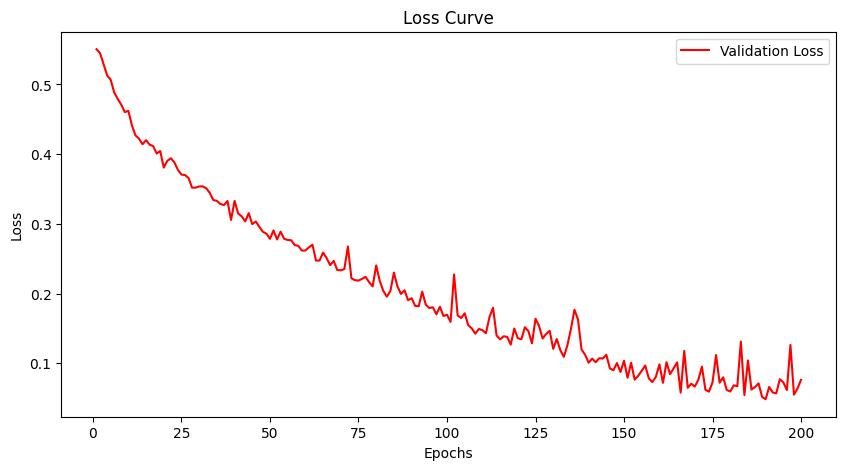

In [161]:
tomita_5_uni_lp .visualize(epochs)

In [162]:
#14. combos: universal + standard

In [163]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_5_uni_sin  = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, no_posi_encoding= no_posi_encoding, num_layers= 6, rope= rope)

In [164]:
epochs = 200
tomita_5_uni_sin.train_eval(epochs)

Epoch [1/200], Loss: 0.535227, dev Accuracy: 0.20%
Epoch [2/200], Loss: 0.505858, dev Accuracy: 0.20%
Epoch [3/200], Loss: 0.484583, dev Accuracy: 0.20%
Epoch [4/200], Loss: 0.470040, dev Accuracy: 0.40%
Epoch [5/200], Loss: 0.456578, dev Accuracy: 0.70%
Epoch [6/200], Loss: 0.440392, dev Accuracy: 0.50%
Epoch [7/200], Loss: 0.428617, dev Accuracy: 0.80%
Epoch [8/200], Loss: 0.428794, dev Accuracy: 1.30%
Epoch [9/200], Loss: 0.388040, dev Accuracy: 2.40%
Epoch [10/200], Loss: 0.382538, dev Accuracy: 3.50%
Epoch [11/200], Loss: 0.357213, dev Accuracy: 5.50%
Epoch [12/200], Loss: 0.345853, dev Accuracy: 6.10%
Epoch [13/200], Loss: 0.334472, dev Accuracy: 7.80%
Epoch [14/200], Loss: 0.340664, dev Accuracy: 9.50%
Epoch [15/200], Loss: 0.323385, dev Accuracy: 9.20%
Epoch [16/200], Loss: 0.336778, dev Accuracy: 8.20%
Epoch [17/200], Loss: 0.328147, dev Accuracy: 9.80%
Epoch [18/200], Loss: 0.294729, dev Accuracy: 12.00%
Epoch [19/200], Loss: 0.295471, dev Accuracy: 14.20%
Epoch [20/200], Los

In [165]:
bin0_uni[1] = tomita_5_uni_sin.test(0)

accuracy of all bin 0 is:  61.2 %


In [166]:
bin1_uni[1] = tomita_5_uni_sin.test(1)

accuracy of all bin 1 is:  0.1 %


In [167]:
sin_uni, sin_uni_n = tomita_5_uni_sin.get_losses('Universal + Sin')

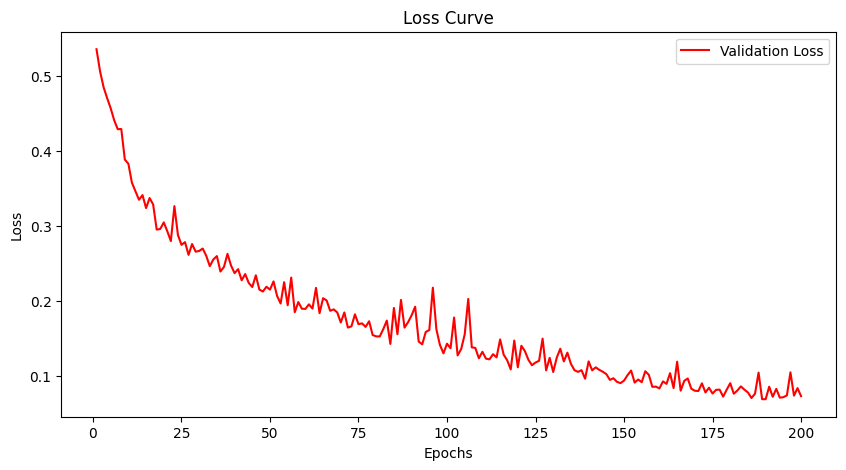

In [168]:
tomita_5_uni_sin.visualize(epochs)

In [169]:
#15. combi: universal + alibi

In [199]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = True
universal = True
no_posi_encoding = False
rope = False
tomita_5_uni_alibi = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =64, nheads= 8 , split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, no_posi_encoding= no_posi_encoding, num_layers= 4, rope= rope)

In [200]:
epochs = 200
tomita_5_uni_alibi.train_eval(epochs)

Epoch [1/200], Loss: 0.549570, dev Accuracy: 0.10%
Epoch [2/200], Loss: 0.522115, dev Accuracy: 0.10%
Epoch [3/200], Loss: 0.504333, dev Accuracy: 0.10%
Epoch [4/200], Loss: 0.494984, dev Accuracy: 0.00%
Epoch [5/200], Loss: 0.475969, dev Accuracy: 0.20%
Epoch [6/200], Loss: 0.464773, dev Accuracy: 0.30%
Epoch [7/200], Loss: 0.464764, dev Accuracy: 0.30%
Epoch [8/200], Loss: 0.447427, dev Accuracy: 0.80%
Epoch [9/200], Loss: 0.452200, dev Accuracy: 1.00%
Epoch [10/200], Loss: 0.445302, dev Accuracy: 1.00%
Epoch [11/200], Loss: 0.438620, dev Accuracy: 1.00%
Epoch [12/200], Loss: 0.429292, dev Accuracy: 1.00%
Epoch [13/200], Loss: 0.439070, dev Accuracy: 0.80%
Epoch [14/200], Loss: 0.426233, dev Accuracy: 1.00%
Epoch [15/200], Loss: 0.421875, dev Accuracy: 1.00%
Epoch [16/200], Loss: 0.418338, dev Accuracy: 0.70%
Epoch [17/200], Loss: 0.450442, dev Accuracy: 0.50%
Epoch [18/200], Loss: 0.438699, dev Accuracy: 0.50%
Epoch [19/200], Loss: 0.433753, dev Accuracy: 0.50%
Epoch [20/200], Loss:

In [201]:
bin0_uni[6] =  tomita_5_uni_alibi.test(0)

accuracy of all bin 0 is:  3.0 %


In [202]:
bin1_uni[6] = tomita_5_uni_alibi.test(1)

accuracy of all bin 1 is:  0.0 %


In [203]:
alibi_uni, alibi_uni_n = tomita_5_uni_alibi.get_losses('Universal + ALiBi')

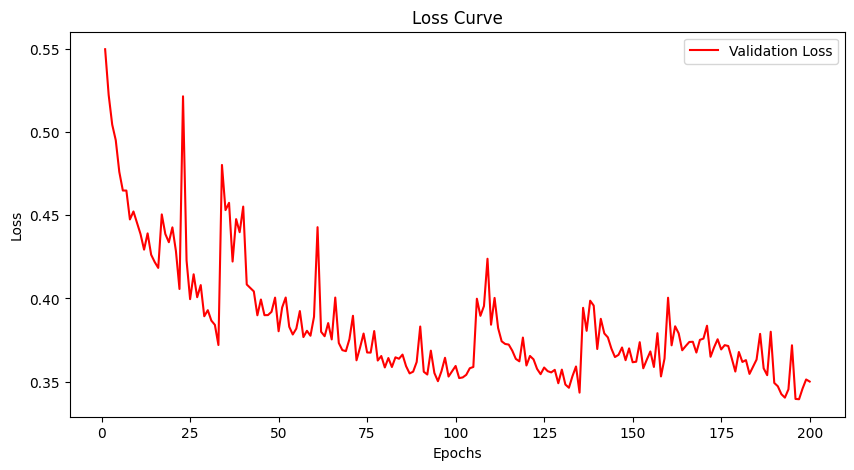

In [204]:
tomita_5_uni_alibi.visualize(epochs)

In [176]:
#16. combos: universal + rope

In [177]:
# Tomita 5:
url = 'data/MyData/Tomita5'
alibi = False
universal = True
no_posi_encoding = False
rope = True
tomita_5_uni_rope = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, no_posi_encoding= no_posi_encoding, num_layers= 6, rope= rope)

In [178]:
epochs = 200
tomita_5_uni_rope.train_eval(epochs)

Epoch [1/200], Loss: 0.572340, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.523891, dev Accuracy: 0.00%
Epoch [3/200], Loss: 0.504004, dev Accuracy: 0.20%
Epoch [4/200], Loss: 0.482124, dev Accuracy: 0.10%
Epoch [5/200], Loss: 0.470119, dev Accuracy: 0.20%
Epoch [6/200], Loss: 0.454280, dev Accuracy: 0.40%
Epoch [7/200], Loss: 0.441225, dev Accuracy: 0.60%
Epoch [8/200], Loss: 0.432004, dev Accuracy: 0.60%
Epoch [9/200], Loss: 0.426483, dev Accuracy: 0.90%
Epoch [10/200], Loss: 0.417285, dev Accuracy: 1.10%
Epoch [11/200], Loss: 0.411009, dev Accuracy: 0.50%
Epoch [12/200], Loss: 0.403256, dev Accuracy: 1.50%
Epoch [13/200], Loss: 0.407160, dev Accuracy: 1.70%
Epoch [14/200], Loss: 0.393124, dev Accuracy: 1.80%
Epoch [15/200], Loss: 0.391032, dev Accuracy: 1.80%
Epoch [16/200], Loss: 0.384239, dev Accuracy: 2.40%
Epoch [17/200], Loss: 0.366013, dev Accuracy: 1.80%
Epoch [18/200], Loss: 0.379412, dev Accuracy: 2.20%
Epoch [19/200], Loss: 0.369520, dev Accuracy: 3.40%
Epoch [20/200], Loss:

In [179]:
bin0_uni[7] = tomita_5_uni_rope.test(0)

accuracy of all bin 0 is:  30.9 %


In [180]:
bin1_uni[7] = tomita_5_uni_rope.test(1)

accuracy of all bin 1 is:  0.0 %


In [181]:
rope_uni, rope_uni_n = tomita_5_uni_rope.get_losses('Universal + RoPE')

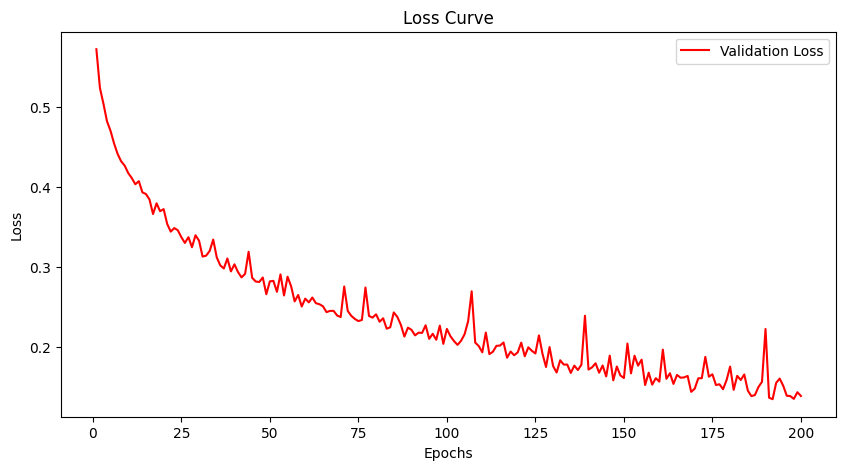

In [182]:
tomita_5_uni_rope.visualize(epochs)

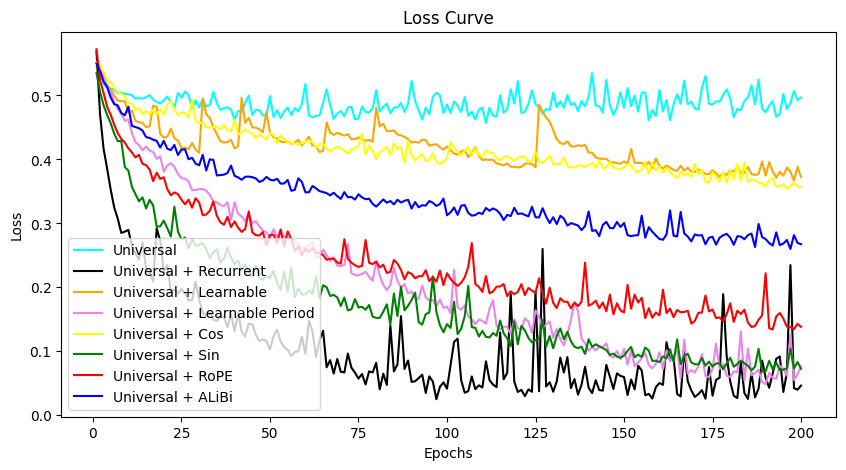

In [183]:
import numpy as np
# plot the losses
epochs = 200
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, epochs + 1), uni, label=uni_n, color='cyan')
plt.plot(np.arange(1, epochs + 1), rec_uni, label=rec_uni_n, color='black')
plt.plot(np.arange(1, epochs + 1), learn_uni, label=learn_uni_n, color='orange')
plt.plot(np.arange(1, epochs + 1), lp_uni, label=lp_uni_n, color='violet')
plt.plot(np.arange(1, epochs + 1), cos_uni, label=cos_uni_n, color='yellow')
plt.plot(np.arange(1, epochs + 1),sin_uni, label=sin_uni_n, color='green')
plt.plot(np.arange(1, epochs + 1), rope_uni, label=rope_uni_n, color='red')
plt.plot(np.arange(1, epochs + 1), alibi_uni, label=alibi_uni_n, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

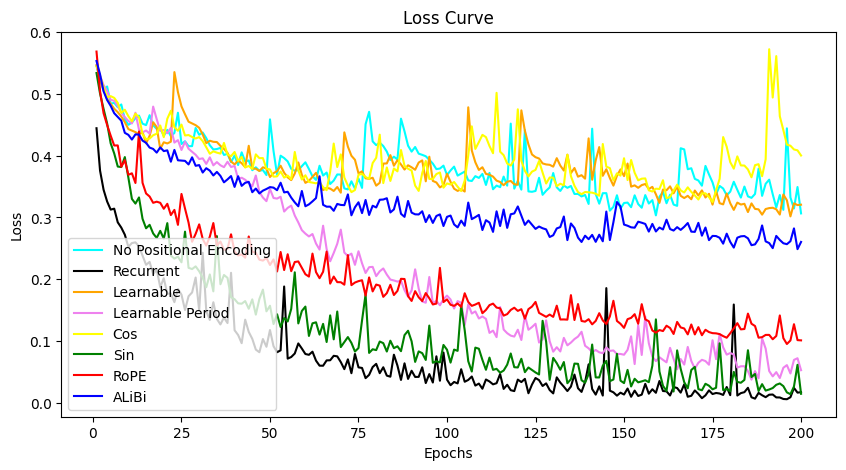

In [196]:
# plot the losses no universal
epochs = 200
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, epochs + 1), nop, label=nop_n, color='cyan')
plt.plot(np.arange(1, epochs + 1), rec, label=rec_n, color='black')
plt.plot(np.arange(1, epochs + 1), learn, label=learn_n, color='orange')
plt.plot(np.arange(1, epochs + 1), lp, label=lp_n, color='violet')
plt.plot(np.arange(1, epochs + 1), cos, label=cos_n, color='yellow')
plt.plot(np.arange(1, epochs + 1),sin, label=sin_n, color='green')
plt.plot(np.arange(1, epochs + 1), rope, label=rope_n, color='red')
plt.plot(np.arange(1, epochs + 1), alibi, label=alibi_n, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [197]:
bin0.append(29.3)
bin1.append(0.0)
bin0_uni.append(0)
bin1_uni.append(0)

In [210]:
print(bin0)
print(bin1)
print(bin0_uni)
print(bin1_uni)

[5.4, 91.1, 2.1, 7.4, 71.4, 94.7, 8.0, 38.1, 29.3]
[0.0, 1.6, 0.0, 0.0, 0.1, 31.1, 0.0, 0.0, 0.0]
[2.1, 61.2, 3.4, 3.0, 44.2, 80.3, 3.0, 30.9, 0]
[0.0, 0.1, 0.0, 0.0, 0.3, 16.7, 0.0, 0.0, 0]


In [208]:
bin0.pop()
bin1.pop()

10.8

In [209]:
bin0.append(29.3)
bin1.append(0.0)

[5.4, 91.1, 2.1, 7.4, 71.4, 94.7, 8.0, 38.1, 29.3]
[0.0, 1.6, 0.0, 0.0, 0.1, 31.1, 0.0, 0.0, 0.0]
[2.1, 61.2, 3.4, 3.0, 44.2, 80.3, 3.0, 30.9, 0]
[0.0, 0.1, 0.0, 0.0, 0.3, 16.7, 0.0, 0.0, 0]


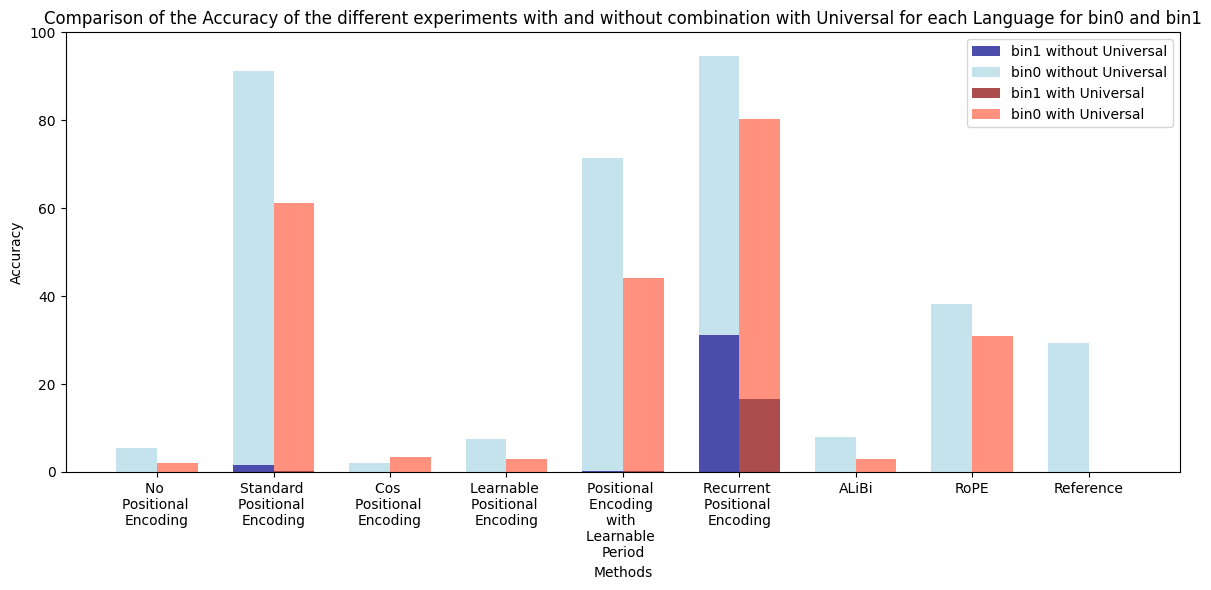

In [211]:
# Plots
categories = ['No \nPositional \nEncoding', 'Standard \nPositional \nEncoding', 'Cos \nPositional \nEncoding', 'Learnable \nPositional \nEncoding', 'Positional \nEncoding \nwith \nLearnable \nPeriod',  'Recurrent \nPositional \nEncoding','ALiBi', 'RoPE', 'Reference']

print(bin0)
print(bin1)
print(bin0_uni)
print(bin1_uni)
# Set the width of each bar
bar_width = 0.35

# Calculate the differences between bin0 and bin1 values
diff_bin0_bin1 = [b0 - b1 for b0, b1 in zip(bin0, bin1)]

# Calculate the differences between bin0_uni and bin1_uni values
diff_bin0_uni_bin1_uni = [b0_uni - b1_uni for b0_uni, b1_uni in zip(bin0_uni, bin1_uni)]

# Create an array of indices for x-axis placement
indices = np.arange(len(categories))

# Create the bar plot for the first pair
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(indices - bar_width / 2, bin1, bar_width, label='bin1 without Universal', alpha=0.7, color='#00008B')
plt.bar(indices - bar_width / 2, diff_bin0_bin1, bar_width, label='bin0 without Universal', bottom=bin1, alpha=0.7, color='#ADD8E6')


# Create the bar plot for the second pair
plt.bar(indices + bar_width / 2, bin1_uni, bar_width, label='bin1 with Universal', alpha=0.7, color = '#8B0000')
plt.bar(indices + bar_width / 2, diff_bin0_uni_bin1_uni, bar_width, label='bin0 with Universal', bottom=bin1_uni, alpha=0.7, color='#FF6347')

# Customize the plot
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Comparison of the Accuracy of the different experiments with and without combination with Universal for each Language for bin0 and bin1')
plt.xticks(indices, categories)
plt.ylim(0, 100)  # Set the y-axis range from 0% to 100% to accommodate both pairs
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()